Import all dependencies librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Importing the data from the local system

In [2]:
df = pd.read_csv('food_coded.csv')

Data Understanding

In [3]:
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
df.shape

(125, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [6]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype in ('int64', 'float64'):
        num_cols.append(df[col].name)
    else:
        cat_cols.append(df[col].name)

In [7]:
num_cols

['Gender',
 'breakfast',
 'calories_chicken',
 'calories_day',
 'calories_scone',
 'coffee',
 'comfort_food_reasons_coded',
 'cook',
 'comfort_food_reasons_coded.1',
 'cuisine',
 'diet_current_coded',
 'drink',
 'eating_changes_coded',
 'eating_changes_coded1',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'father_education',
 'fav_cuisine_coded',
 'fav_food',
 'fries',
 'fruit_day',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'ideal_diet_coded',
 'income',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'nutritional_check',
 'on_off_campus',
 'parents_cook',
 'pay_meal_out',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'thai_food',
 'tortilla_calories',
 'turkey_calories',
 'veggies_day',
 'vitamins',
 'waffle_calories']

In [8]:
cat_cols

['GPA',
 'comfort_food',
 'comfort_food_reasons',
 'diet_current',
 'eating_changes',
 'father_profession',
 'fav_cuisine',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'meals_dinner_friend',
 'mother_profession',
 'type_sports',
 'weight']

# Missing Value Treatment

In [9]:
(df.isnull().sum() / len(df) * 100).map('{:.2f}%'.format).sort_values(ascending=False)

employment                       7.20%
type_sports                     20.80%
eating_changes                   2.40%
mother_education                 2.40%
meals_dinner_friend              2.40%
cook                             2.40%
father_profession                2.40%
calories_day                    15.20%
comfort_food_reasons_coded      15.20%
cuisine                         13.60%
exercise                        10.40%
GPA                              1.60%
sports                           1.60%
mother_profession                1.60%
fav_food                         1.60%
fav_cuisine                      1.60%
weight                           1.60%
comfort_food_reasons             1.60%
drink                            1.60%
calories_scone                   0.80%
healthy_meal                     0.80%
self_perception_weight           0.80%
soup                             0.80%
income                           0.80%
tortilla_calories                0.80%
food_childhood           

<Axes: >

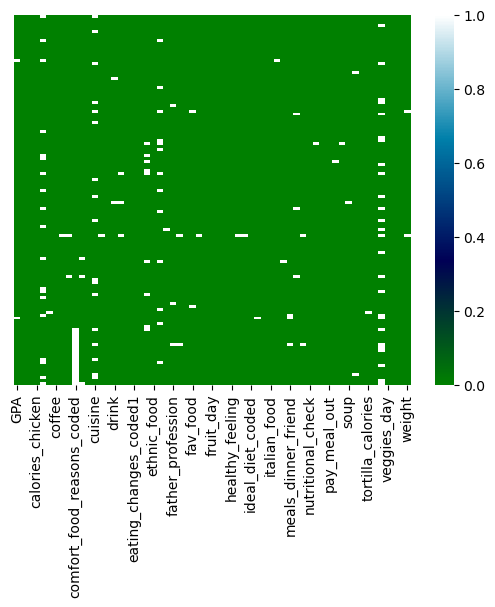

In [10]:
sns.heatmap(df.isnull(), yticklabels=False,cmap="ocean")

Observation:

After performing an examination of the missing data, 
it is evident that the 'type_sports' column exhibits the highest number of missing values, 
followed by 'calories_day,' 'comfort_food_reasons_coded,' 'cuisine,' and so forth. 
This observation provides insight into the columns with the most significant instances of missing data within the dataset.

In [11]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current_coded,drink,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,fav_cuisine_coded,fav_food,fries,fruit_day,grade_level,greek_food,healthy_feeling,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,mother_education,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,125.000000,123.000000,125.000000,125.000000,125.00000,116.000000,125.000000,112.000000,124.000000,125.000000,123.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,122.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,1.760000,1.560976,1.536000,4.552000,2.56000,2.448276,3.744000,1.589286,3.483871,2.424000,1.715447,1.088000,4.224000,2.376000,3.488000,5.456000,3.704000,4.532258,3.152000,4.728000,5.104839,1.500000,3.426230,3.152000,1.322581,1.528000,3.408000,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,0.766222,0.498298,0.757159,2.547788,1.13876,0.533158,1.177093,0.665137,1.206243,1.947968,0.910056,0.284435,0.923388,1.133536,1.365567,2.585643,2.086918,1.456332,1.486802,0.587175,3.120399,0.548464,1.170703,1.205204,0.681323,0.746778,1.040285,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.00000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.00000,2.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,5.000000,3.00000,3.000000,5.000000,2.000000,4.000000,4.000000,3.000000,1.000000,5.000000,3.000000,5.000000,8.000000,6.000000,6.000000,5.000000,5.000000,8.000000,2.000000,4.000000,4.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,4.000000,2.000000,4.000000,13.000000,5.00000,3.000000,5.000000,3.000000,5.000000,8.000000,3.000000,2.000000,5.000000,4.000000,5.000000,1

In [12]:
def fill_null(df):
    for col in df:
        if (col in num_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print('fillna num_cols: ',col)
        if (col in cat_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna cat_cols: ',col)

In [13]:
fill_null(df)

fillna cat_cols:  GPA
fillna num_cols:  calories_day
fillna num_cols:  calories_scone
fillna cat_cols:  comfort_food
fillna cat_cols:  comfort_food_reasons
fillna num_cols:  comfort_food_reasons_coded
fillna num_cols:  cook
fillna num_cols:  cuisine
fillna cat_cols:  diet_current
fillna num_cols:  drink
fillna cat_cols:  eating_changes
fillna num_cols:  employment
fillna num_cols:  exercise
fillna num_cols:  father_education
fillna cat_cols:  father_profession
fillna cat_cols:  fav_cuisine
fillna num_cols:  fav_food
fillna cat_cols:  food_childhood
fillna cat_cols:  healthy_meal
fillna cat_cols:  ideal_diet
fillna num_cols:  income
fillna num_cols:  life_rewarding
fillna num_cols:  marital_status
fillna cat_cols:  meals_dinner_friend
fillna num_cols:  mother_education
fillna cat_cols:  mother_profession
fillna num_cols:  on_off_campus
fillna num_cols:  persian_food
fillna num_cols:  self_perception_weight
fillna num_cols:  soup
fillna num_cols:  sports
fillna num_cols:  tortilla_calori

In [14]:
df.isnull().sum()

GPA                             0
Gender                          0
breakfast                       0
calories_chicken                0
calories_day                    0
calories_scone                  0
coffee                          0
comfort_food                    0
comfort_food_reasons            0
comfort_food_reasons_coded      0
cook                            0
comfort_food_reasons_coded.1    0
cuisine                         0
diet_current                    0
diet_current_coded              0
drink                           0
eating_changes                  0
eating_changes_coded            0
eating_changes_coded1           0
eating_out                      0
employment                      0
ethnic_food                     0
exercise                        0
father_education                0
father_profession               0
fav_cuisine                     0
fav_cuisine_coded               0
fav_food                        0
food_childhood                  0
fries         

# Exploratory Data Analysis

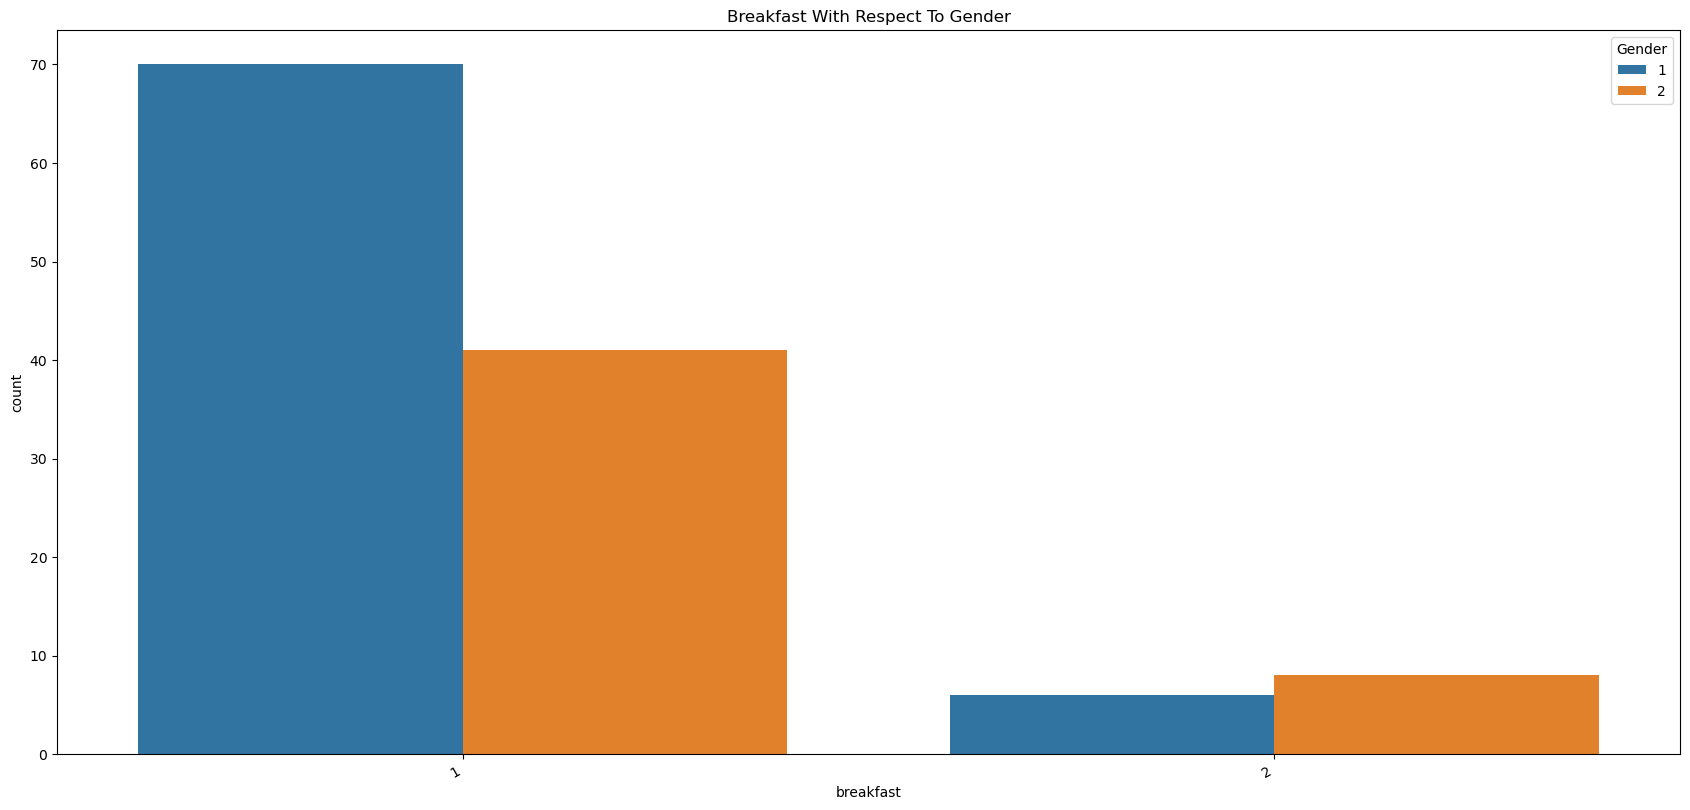

In [15]:
objects_breakfast=['Cereal ','Donut ']
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "breakfast", hue = "Gender", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.title('Breakfast With Respect To Gender')
plt.show()

Observation: 

    Exploring breakfast choices among students reveals an interesting trend: 
    while most female students lean towards 'Cereal' as their breakfast choice, 
    male students tend to favor 'Donut' over 'Cereal'. 
    This insight sheds light on the distinct preferences between male and 
    female students when it comes to their breakfast selections.

In [16]:
calories_day = df['calories_day'].value_counts()
print(calories_day)

calories_day
3.000000    63
4.000000    23
2.000000    20
3.028302    19
Name: count, dtype: int64


In [17]:
objects_calories_day = ('Very Important','Moderately Important','Not Important','Not Known')
y__breakfast = np.array([23,63,20,19])
myexplode = [0.2, 0,0,0]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

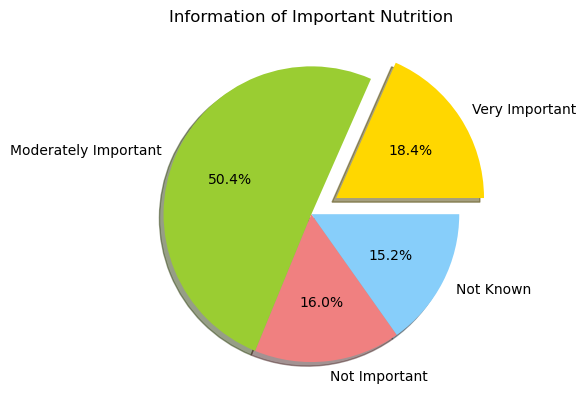

In [18]:
plt.pie(y__breakfast, labels = objects_calories_day,explode = myexplode,autopct='%1.1f%%',colors =colors, shadow = True)
plt.title('Information of Important Nutrition')
plt.show() 

Observation:

Analyzing students' perceptions of daily caloric intake, it's noteworthy that the majority, constituting 50.4%, consider it "Moderately Important". This finding provides valuable insight into the significance placed by students on their daily caloric intake.

In [19]:
cook = df['cook'].value_counts()
print(cook)

cook
3.000000    49
2.000000    34
4.000000    18
1.000000    13
5.000000     8
2.786885     3
Name: count, dtype: int64


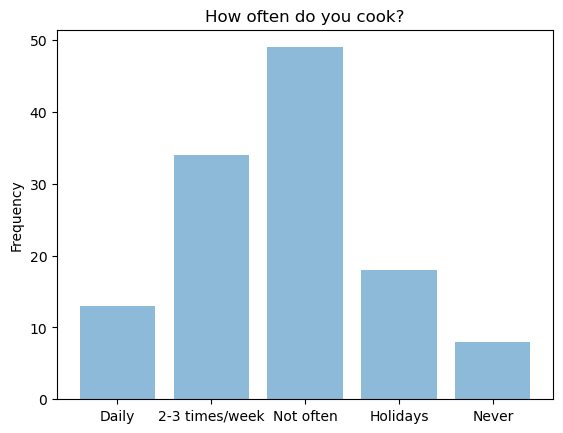

In [20]:
objects_cook = ('Daily', '2-3 times/week', 'Not often', 'Holidays', 'Never')
y_pos = np.arange(len(objects_cook))
performance = [13, 34, 49, 18, 8]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects_cook)
plt.ylabel('Frequency')
plt.title('How often do you cook?')
 
plt.show()

Observation:

Analyzing the frequency of cooking among students, it's apparent that the category 'Not often' is the most prevalent. This suggests that a significant portion of the students does, in fact, engage in regular cooking activities.

In [21]:
coffee = df['coffee'].value_counts()
print(coffee)

coffee
2    94
1    31
Name: count, dtype: int64


In [22]:
objects_coffee = ('Creamy Frappuccino','Espresso Shown')
y__coffee = np.array([31,94])
myexplode = [0.2, 0]
colors = ['Blue', 'Red']

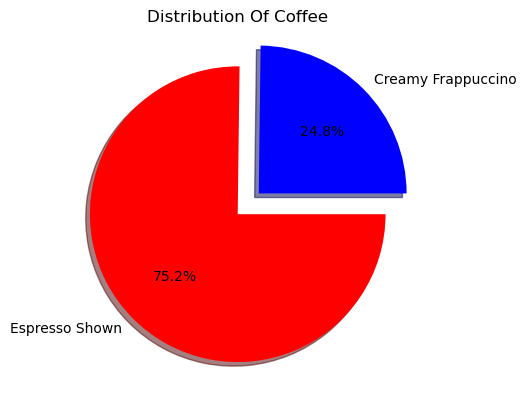

In [23]:
plt.pie(y__coffee, labels = objects_coffee,explode = myexplode,autopct='%1.1f%%',colors =colors, shadow = True)
plt.title('Distribution Of Coffee')
plt.show() 

Observation:

Analyzing students' coffee preferences and differentiating between 'Creamy Frappuccino' and 'Espresso Shown,' it's evident that a majority of students prefer 'Espresso Shown.'

In [24]:
comfort_food_reasons_coded = df['comfort_food_reasons_coded'].value_counts()
print(comfort_food_reasons_coded)

comfort_food_reasons_coded
2.000000    49
1.000000    22
2.698113    19
3.000000    18
9.000000     5
5.000000     4
4.000000     3
7.000000     3
6.000000     1
8.000000     1
Name: count, dtype: int64


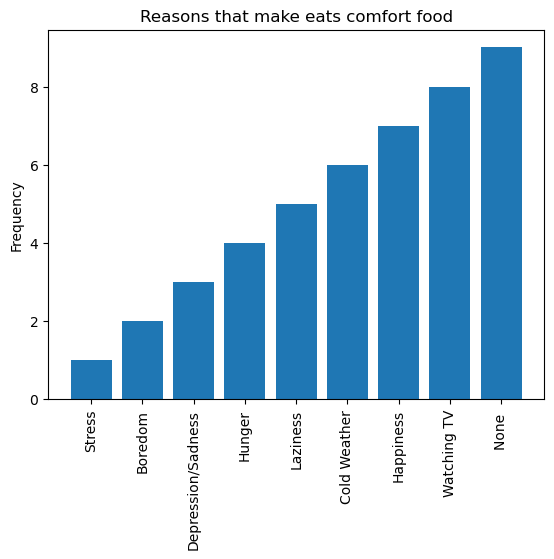

In [25]:
objects_comfort_food_reasons_coded = ('Stress', 'Boredom', 'Depression/Sadness', 'Hunger', 'Laziness','Cold Weather','Happiness','Watching TV','None ')
y_pos_comfort_food_reasons_coded = np.arange(len(objects_comfort_food_reasons_coded))
performance_comfort_food_reasons_coded = [1, 2, 3, 4, 5,6,7,8,9]

plt.bar(y_pos_comfort_food_reasons_coded, performance_comfort_food_reasons_coded, align='center', alpha=1.0,width=0.8)
plt.xticks(y_pos_comfort_food_reasons_coded, objects_comfort_food_reasons_coded,rotation=90)
plt.ylabel('Frequency')
plt.title('Reasons that make eats comfort food')
 
plt.show()

Observation:

Analyzing the emotional factors that influence food choices among students, including 'Stress,' 'Boredom,' 'Depression/Sadness,' 'Hunger,' 'Laziness,' 'Cold Weather,' 'Happiness,' 'Watching TV,' and the 'None' category. It's worth noting that a significant number of students did not provide answers ('None') during the survey. Among those who did respond, a substantial preference was observed for having food while watching TV.

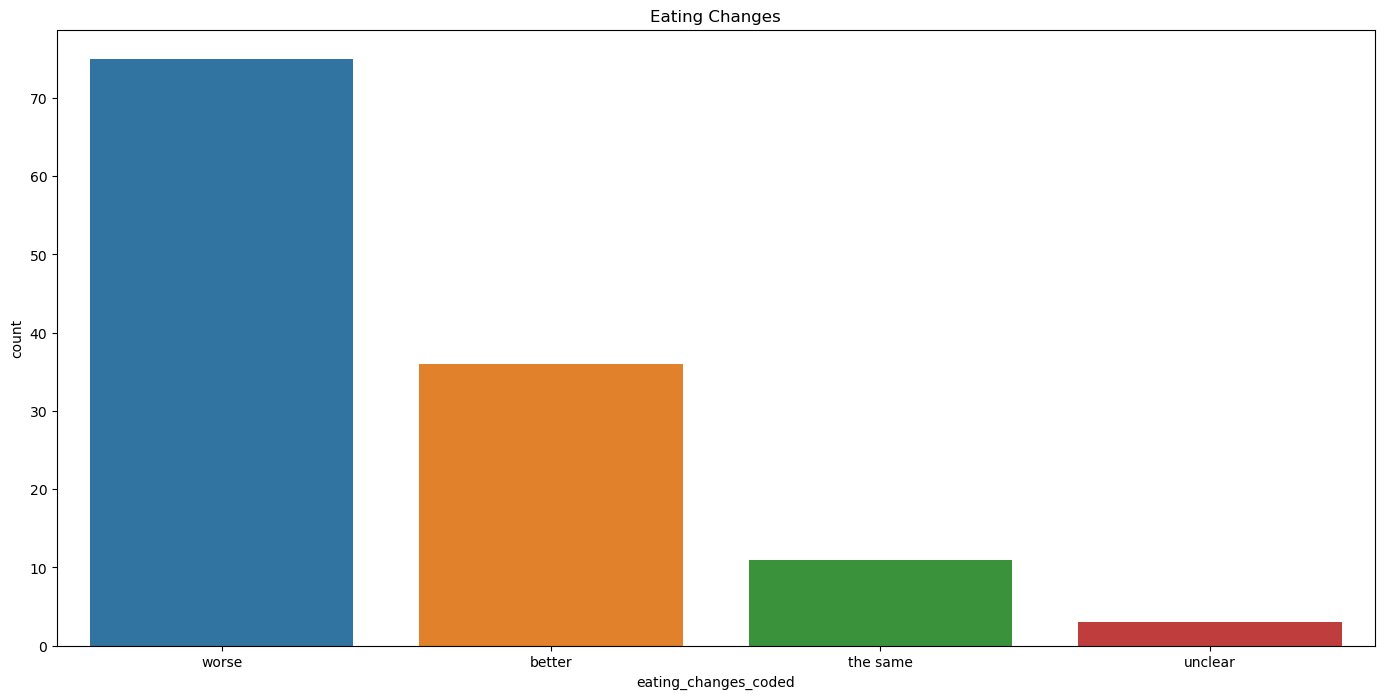

In [26]:
objects_eating_changes_coded=['worse','better','the same','unclear']
plt.figure(figsize=(17,8))
ax = sns.countplot(x=df["eating_changes_coded"]).set_xticklabels(objects_eating_changes_coded)
plt.title('Eating Changes')
plt.show()

Observation:

Examining the variations in students' eating habits, which are categorized as 'worse,' 'better,' 'the same,' or 'unclear.' 
It is notable that the majority of students reported their eating habits as getting "worse."

In [27]:
fav_cuisine_coded = df['fav_cuisine_coded'].value_counts()
print(fav_cuisine_coded)

fav_cuisine_coded
1    59
4    22
5    15
2    15
0     6
8     4
3     2
6     1
7     1
Name: count, dtype: int64


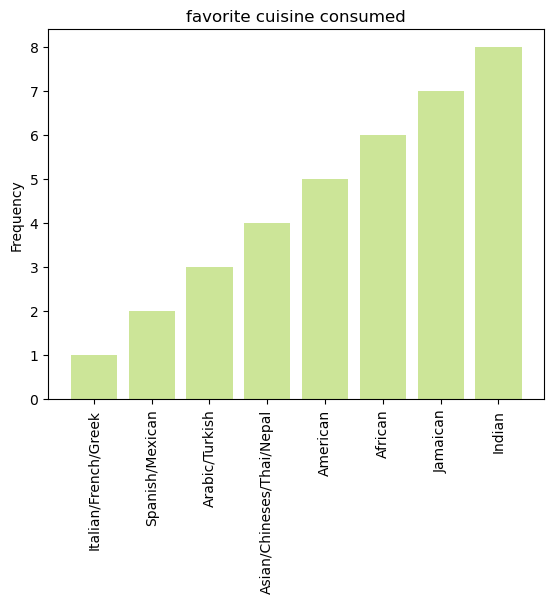

In [28]:
objects_fav_cuisine_coded = ('Italian/French/Greek', 'Spanish/Mexican', 'Arabic/Turkish', 'Asian/Chineses/Thai/Nepal', 'American','African','Jamaican','Indian')
y_pos_objects_fav_cuisine_coded = np.arange(len(objects_fav_cuisine_coded))
performance_objects_fav_cuisine_coded = [1, 2, 3, 4, 5,6,7,8]

plt.bar(y_pos_objects_fav_cuisine_coded, performance_objects_fav_cuisine_coded, align='center', alpha=0.5,color = 'yellowgreen')
plt.xticks(y_pos_objects_fav_cuisine_coded, objects_fav_cuisine_coded,rotation=90)
plt.ylabel('Frequency')
plt.title('favorite cuisine consumed')
 
plt.show()

Observation:

Exploring students' favorite cuisines, with options including 'Italian/French/Greek,' 'Spanish/Mexican,' 'Arabic/Turkish,' 'Asian/Chineses/Thai/Nepal,' 'American,' 'African,' 'Jamaican,' and 'Indian.' It's interesting to note that Indian cuisine is the top choice among students.

# Data Encoding

In [29]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['GPA', 'comfort_food', 'comfort_food_reasons', 'diet_current',
       'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood',
       'healthy_meal', 'ideal_diet', 'meals_dinner_friend',
       'mother_profession', 'type_sports', 'weight'],
      dtype='object')


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
for col in objList:
    df[col] = le.fit_transform(df[col].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    int32  
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    int32  
 8   comfort_food_reasons          125 non-null    int32  
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [32]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,2,1,430,3.028302,315.0,1,110,104,9.0,2.0,9,1.388889,112,1,1.0,105,1,1,3,3.0,1,1.0,5.0,106,8,3,1.0,106,2,5,2,5,2,107,112,8,5.0,5,5,1.0,1.0,115,1.0,110,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,39,5,1,1315,34
1,19,1,1,610,3.000000,420.0,2,83,57,1.0,3.0,1,1.000000,36,2,2.0,48,1,2,2,2.0,4,1.0,2.0,68,26,1,1.0,75,1,4,4,4,5,37,105,3,4.0,4,4,1.0,2.0,50,4.0,45,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,1,4,2,900,22
2,11,1,1,720,4.000000,420.0,2,98,100,1.0,1.0,1,3.000000,122,3,1.0,119,1,3,2,3.0,5,2.0,2.0,104,52,1,3.0,94,1,5,3,5,6,120,117,6,6.0,5,5,7.0,2.0,91,2.0,98,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,49,5,1,900,45
3,9,1,1,430,3.000000,420.0,2,59,6,2.0,2.0,2,2.000000,8,2,2.0,1,1,3,2,3.0,5,3.0,2.0,44,46,3,1.0,0,2,4,4,5,7,34,24,2,6.0,5,5,2.0,2.0,26,4.0,69,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,49,3,1,1315,46
4,14,1,1,720,2.000000,420.0,2,34,61,1.0,1.0,1,2.000000,64,2,2.0,61,3,4,2,2.0,4,1.0,4.0,38,27,1,3.0,42,1,4,4,4,6,8,48,2,6.0,2,5,1.0,1.0,7,5.0,74,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,27,4,2,760,35


In [33]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

# Features Selection

In [34]:
df = df.reindex(columns=['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons','comfort_food_reasons_coded',
        'cook','cuisine', 'diet_current', 'diet_current_coded', 'drink','eating_changes', 'eating_changes_coded',
        'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight'])

In [35]:
categories = df.columns[2:]

In [36]:
categories

Index(['breakfast', 'calories_chicken', 'calories_day', 'calories_scone',
       'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'cuisine', 'diet_current',
       'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vit

In [37]:
scaled_features = df.copy()

In [38]:
scaled_features

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,2,1,430,3.028302,315.0,1,110,104,9.000000,2.000000,1.388889,112,1,1.0,105,1,3,3.0,1,1.0,5.0,106,8,3,1.0,106,2,5,2,5,2,107,112,8,5.0,5,5,1.0,1.0,115,1.0,110,5,1.0,1,2,5.0,3.0,1.0,1.000000,1,1165.0,345,39,5,1,1315,34
1,19,1,1,610,3.000000,420.0,2,83,57,1.000000,3.000000,1.000000,36,2,2.0,48,1,2,2.0,4,1.0,2.0,68,26,1,1.0,75,1,4,4,4,5,37,105,3,4.0,4,4,1.0,2.0,50,4.0,45,4,1.0,1,4,4.0,3.0,1.0,1.000000,2,725.0,690,1,4,2,900,22
2,11,1,1,720,4.000000,420.0,2,98,100,1.000000,1.000000,3.000000,122,3,1.0,119,1,2,3.0,5,2.0,2.0,104,52,1,3.0,94,1,5,3,5,6,120,117,6,6.0,5,5,7.0,2.0,91,2.0,98,4,2.0,1,3,5.0,6.0,1.0,2.000000,5,1165.0,500,49,5,1,900,45
3,9,1,1,430,3.000000,420.0,2,59,6,2.000000,2.000000,2.000000,8,2,2.0,1,1,2,3.0,5,3.0,2.0,44,46,3,1.0,0,2,4,4,5,7,34,24,2,6.0,5,5,2.0,2.0,26,4.0,69,2,1.0,1,2,5.0,5.0,1.0,2.000000,5,725.0,690,49,3,1,1315,46
4,14,1,1,720,2.000000,420.0,2,34,61,1.000000,1.000000,2.000000,64,2,2.0,61,3,2,2.0,4,1.0,4.0,38,27,1,3.0,42,1,4,4,4,6,8,48,2,6.0,2,5,1.0,1.0,7,5.0,74,3,1.0,1,4,2.0,4.0,1.0,1.000000,4,940.0,500,27,4,2,760,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,1,1,610,4.000000,420.0,2,123,72,2.698113,3.000000,1.000000,87,2,2.0,65,1,2,1.0,4,2.0,4.0,0,27,1,1.0,71,1,5,4,5,5,114,84,6,4.0,3,5,7.0,1.0,107,3.0,54,5,3.0,1,4,3.0,4.0,1.0,1.000000,5,940.0,500,27,5,1,1315,23
121,7,1,1,265,2.000000,315.0,2,54,40,2.698113,3.000000,1.388889,2,2,1.0,9,1,4,3.0,3,2.0,5.0,24,37,2,1.0,26,1,4,4,1,5,7,18,5,2.0,5,5,7.0,1.0,24,2.0,52,3,1.0,3,4,1.0,4.0,1.0,1.390244,4,940.0,500,38,5,2,1315,31
122,30,1,1,720,3.028302,420.0,1,120,88,2.698113,3.000000,1.388889,99,2,1.0,110,1,3,3.0,5,2.0,5.0,9,33,4,1.0,54,1,4,3,5,6,112,120,2,2.0,5,3,10.0,1.0,100,1.0,57,3,1.0,2,4,5.0,4.0,1.0,2.000000,5,580.0,690,49,4,2,1315,8
123,7,2,1,720,4.000000,420.0,1,46,84,2.698113,3.000000,1.000000,62,1,2.0,34,1,5,2.0,2,1.0,3.0,75,26,1,3.0,100,1,5,1,1,1,12,69,6,4.0,1,5,1.0,1.0,56,2.0,58,4,1.0,2,3,1.0,2.0,2.0,2.000000,1,940.0,500,49,3,1,1315,15


In [39]:
features = scaled_features[categories]

In [40]:
features

,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,1,430,3.028302,315.0,1,110,104,9.000000,2.000000,1.388889,112,1,1.0,105,1,3,3.0,1,1.0,5.0,106,8,3,1.0,106,2,5,2,5,2,107,112,8,5.0,5,5,1.0,1.0,115,1.0,110,5,1.0,1,2,5.0,3.0,1.0,1.000000,1,1165.0,345,39,5,1,1315,34
1,1,610,3.000000,420.0,2,83,57,1.000000,3.000000,1.000000,36,2,2.0,48,1,2,2.0,4,1.0,2.0,68,26,1,1.0,75,1,4,4,4,5,37,105,3,4.0,4,4,1.0,2.0,50,4.0,45,4,1.0,1,4,4.0,3.0,1.0,1.000000,2,725.0,690,1,4,2,900,22
2,1,720,4.000000,420.0,2,98,100,1.000000,1.000000,3.000000,122,3,1.0,119,1,2,3.0,5,2.0,2.0,104,52,1,3.0,94,1,5,3,5,6,120,117,6,6.0,5,5,7.0,2.0,91,2.0,98,4,2.0,1,3,5.0,6.0,1.0,2.000000,5,1165.0,500,49,5,1,900,45
3,1,430,3.000000,420.0,2,59,6,2.000000,2.000000,2.000000,8,2,2.0,1,1,2,3.0,5,3.0,2.0,44,46,3,1.0,0,2,4,4,5,7,34,24,2,6.0,5,5,2.0,2.0,26,4.0,69,2,1.0,1,2,5.0,5.0,1.0,2.000000,5,725.0,690,49,3,1,1315,46
4,1,720,2.000000,420.0,2,34,61,1.000000,1.000000,2.000000,64,2,2.0,61,3,2,2.0,4,1.0,4.0,38,27,1,3.0,42,1,4,4,4,6,8,48,2,6.0,2,5,1.0,1.0,7,5.0,74,3,1.0,1,4,2.0,4.0,1.0,1.000000,4,940.0,500,27,4,2,760,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,610,4.000000,420.0,2,123,72,2.698113,3.000000,1.000000,87,2,2.0,65,1,2,1.0,4,2.0,4.0,0,27,1,1.0,71,1,5,4,5,5,114,84,6,4.0,3,5,7.0,1.0,107,3.0,54,5,3.0,1,4,3.0,4.0,1.0,1.000000,5,940.0,500,27,5,1,1315,23
121,1,265,2.000000,315.0,2,54,40,2.698113,3.000000,1.388889,2,2,1.0,9,1,4,3.0,3,2.0,5.0,24,37,2,1.0,26,1,4,4,1,5,7,18,5,2.0,5,5,7.0,1.0,24,2.0,52,3,1.0,3,4,1.0,4.0,1.0,1.390244,4,940.0,500,38,5,2,1315,31
122,1,720,3.028302,420.0,1,120,88,2.698113,3.000000,1.388889,99,2,1.0,110,1,3,3.0,5,2.0,5.0,9,33,4,1.0,54,1,4,3,5,6,112,120,2,2.0,5,3,10.0,1.0,100,1.0,57,3,1.0,2,4,5.0,4.0,1.0,2.000000,5,580.0,690,49,4,2,1315,8
123,1,720,4.000000,420.0,1,46,84,2.698113,3.000000,1.000000,62,1,2.0,34,1,5,2.0,2,1.0,3.0,75,26,1,3.0,100,1,5,1,1,1,12,69,6,4.0,1,5,1.0,1.0,56,2.0,58,4,1.0,2,3,1.0,2.0,2.0,2.000000,1,940.0,500,49,3,1,1315,15


In [41]:
features.describe()

,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.112000,577.320000,3.028302,505.241935,1.75200,61.008000,53.168000,2.698113,2.786885,1.388889,61.008000,1.760000,1.560976,61.696000,1.536000,2.56000,2.448276,3.744000,1.589286,3.483871,54.240000,28.640000,2.424000,1.715447,55.696000,1.088000,4.224000,2.376000,3.488000,5.456000,61.008000,61.008000,3.704000,4.532258,3.152000,4.728000,5.104839,1.500000,58.720000,3.426230,55.928000,3.152000,1.322581,1.528000,3.408000,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,35.712000,4.008000,1.512000,1073.400000,23.016000
std,0.316636,131.214156,0.588294,229.907814,0.43359,36.214748,30.666188,1.814679,1.025714,0.905479,36.214748,0.766222,0.494263,35.751883,0.757159,1.13876,0.513445,1.177093,0.629305,1.201369,33.466256,14.441986,1.947968,0.902687,32.376122,0.284435,0.923388,1.133536,1.365567,2.585643,36.214748,36.214748,2.086918,1.450448,1.486802,0.587175,3.107791,0.546248,35.219954,1.156455,32.387068,1.205204,0.678570,0.746778,1.040285,1.418071,1.111471,0.412711,0.485834,1.436528,201.273650,152.370379,18.208389,1.081337,0.501867,248.667092,10.721537
min,1.000000,265.000000,2.000000,315.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,0.000000,1.000000,1.000000,575.000000,0.000000
25%,1.000000,430.000000,3.000000,420.000000,2.00000,30.000000,26.000000,2.000000,2.000000,1.000000,30.000000,1.000000,1.000000,31.000000,1.000000,2.00000,2.000000,3.000000,1.000000,2.000000,25.000000,23.000000,1.000000,1.000000,30.000000,1.000000,4.000000,1.000000,3.000000,3.000000,30.000000,30.000000,2.000000,4.000000,2.000000,5.000000,2.000000,1.000000,27.000000,2.000000,29.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,21.000000,3.000000,1.000000,900.000000,15.000000
50%,1.000000,610.000000,3.000000,420.000000,2.00000,61.000000,56.000000,2.000000,3.000000,1.000000,61.000000,2.000000,2.000000,62.000000,1.000000,2.00000,2.448276,4.000000,1.589286,4.000000,53.000000,27.000000,1.000000,1.000000,54.000000,1.000000,5.000000,2.000000,4.000000,5.000000,61.000000,61.000000,3.000000,5.000000,3.000000,5.000000,5.000000,1.000000,58.000000,4.000000,58.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000

# Data Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features.values)

In [43]:
features

array([[-0.3551424 , -1.12726282,  0.        , ..., -1.02429504,
         0.9754899 ,  1.02860266],
       [-0.3551424 ,  0.25006074, -0.04830203, ...,  0.97628121,
        -0.70012396, -0.09514387],
       [-0.3551424 ,  1.09175848,  1.65836961, ..., -1.02429504,
        -0.70012396,  2.05870364],
       ...,
       [-0.3551424 ,  1.09175848,  0.        , ...,  0.97628121,
         0.9754899 , -1.40618149],
       [-0.3551424 ,  1.09175848,  1.65836961, ..., -1.02429504,
         0.9754899 , -0.75066268],
       [-0.3551424 , -1.12726282,  0.        , ...,  0.97628121,
        -2.01235169, -0.75066268]])

In [44]:
scaled_features[categories]= features

In [45]:
scaled_features

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,2,-0.355142,-1.127263,0.000000,-0.830800,-1.741338,1.358263,1.664261,3.486702e+00,-0.770246,0.000000,1.413711,-0.995871,-1.139541,1.216111,-0.710758,0.387940,1.078877,-2.340547,-0.940175,1.267079,1.552856,-1.434917,0.296883,-0.795764,1.559990,3.21926,0.843765,-0.333040,1.111688,-1.341990,1.275090,1.413711,2.066822,0.323779,1.247938,0.465099,-1.326137,-0.919018,1.604388,-2.106432,1.676274,1.539521,-0.477296,-0.709883,-1.358921,1.553078,-0.109274,-0.529712,-8.064778e-01,-1.632687,1.084565,-1.384030,0.181303,0.921074,-1.024295,0.975490,1.028603
1,19,1,-0.355142,0.250061,-0.048302,-0.372258,0.574271,0.609710,0.125461,-9.395305e-01,0.208608,-0.431212,-0.693326,0.314485,0.891815,-0.384626,-0.710758,-0.493742,-0.876587,0.218360,-0.940175,-1.240120,0.412815,-0.183536,-0.733960,-0.795764,0.598641,-0.31063,-0.243561,1.438451,0.376445,-0.177068,-0.665602,1.219642,-0.338697,-0.368438,0.572647,-1.244825,-1.326137,0.919018,-0.248583,0.498143,-0.338776,0.706447,-0.477296,-0.709883,0.571365,0.845057,-0.109274,-0.529712,-8.064778e-01,-0.933763,-1.110311,0.889301,-1.914046,-0.007428,0.976281,-0.700124,-0.095144
2,11,1,-0.355142,1.091758,1.658370,-0.372258,0.574271,1.025573,1.533300,-9.395305e-01,-1.749100,1.786451,1.690953,1.624841,-1.139541,1.609275,-0.710758,-0.493742,1.078877,1.071329,0.655273,-1.240120,1.492854,1.624015,-0.733960,1.428759,1.187855,-0.31063,0.843765,0.552705,1.111688,0.211239,1.635505,1.552332,1.104614,1.015996,1.247938,0.465099,0.612264,0.919018,0.920214,-1.238240,1.304265,0.706447,1.002321,-0.709883,-0.393778,1.553078,2.600715,-0.529712,1.260122e+00,1.163010,1.084565,-0.362679,0.732710,0.921074,-1.024295,-0.700124,2.058704
3,9,1,-0.355142,-1.127263,-0.048302,-0.372258,0.574271,-0.055670,-1.544301,-3.862514e-01,-0.770246,0.677619,-1.469603,0.314485,0.891815,-1.704533,-0.710758,-0.493742,1.078877,1.071329,2.250721,-1.240120,-0.307211,1.206888,0.296883,-0.795764,-1.727203,3.21926,-0.243561,1.438451,1.111688,0.599547,-0.748775,-1.026016,-0.819801,1.015996,1.247938,0.465099,-1.003070,0.919018,-0.932757,0.498143,0.405242,-0.959701,-0.477296,-0.709883,-1.358921,1.553078,1.697385,-0.529712,1.260122e+00,1.163010,-1.110311,0.889301,0.732710,-0.935930,-1.024295,0.975490,2.152349
4,14,1,-0.355142,1.091758,-1.754974,-0.372258,0.574271,-0.748775,0.256423,-9.395305e-01,-1.749100,0.677619,0.082951,0.314485,0.891815,-0.019546,1.941324,-0.493742,-0.876587,0.218360,-0.940175,0.431346,-0.487218,-0.114015,-0.733960,1.428759,-0.424730,-0.31063,-0.243561,1.438451,0.376445,0.211239,-1.469603,-0.360636,-0.819801,1.015996,-0.777935,0.465099,-1.326137,-0.919018,-1.474395,1.366334,0.560246,-0.126627,-0.477296,-0.709883,0.571365,-0.570985,0.794056,-0.529712,-8.064778e-01,0.464086,-0.037815,-0.362679,-0.480386,-0.007428,0.976281,-1.265391,1.122248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,1,-0.355142,0.250061,1.658370,-0.372258,0.574271,1.718677,0.616568,2.457053e-16,0.208608,-0.431212,0.720607,0.314485,0.891815,0.092787,-0.710758,-0.493742,-2.832051,0.218360,0.655273,0.431346,-1.627259,-0

# Model Building & Comparison  

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans( random_state=0)

In [47]:
model = kmeans.fit(scaled_features)

In [48]:
model

KMeans(random_state=0)

Utilizing the Elbow method as part of the K-Means clustering process to determine the optimal number of clusters (K). By evaluating different values of K, we can observe an "elbow" point on the graph that indicates the point at which the addition of more clusters doesn't significantly improve the model's performance. 

## Elbow Method

In [49]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

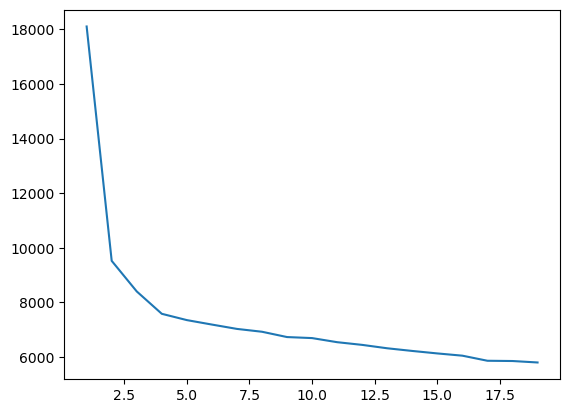

In [50]:
plt.plot(range(1,20), inertia)

In [51]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [52]:
model = kmeans.fit(scaled_features)

In [53]:
scaled_features['cluster'] = kmeans.labels_

In [54]:
scaled_features

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,cluster
0,2,2,-0.355142,-1.127263,0.000000,-0.830800,-1.741338,1.358263,1.664261,3.486702e+00,-0.770246,0.000000,1.413711,-0.995871,-1.139541,1.216111,-0.710758,0.387940,1.078877,-2.340547,-0.940175,1.267079,1.552856,-1.434917,0.296883,-0.795764,1.559990,3.21926,0.843765,-0.333040,1.111688,-1.341990,1.275090,1.413711,2.066822,0.323779,1.247938,0.465099,-1.326137,-0.919018,1.604388,-2.106432,1.676274,1.539521,-0.477296,-0.709883,-1.358921,1.553078,-0.109274,-0.529712,-8.064778e-01,-1.632687,1.084565,-1.384030,0.181303,0.921074,-1.024295,0.975490,1.028603,0
1,19,1,-0.355142,0.250061,-0.048302,-0.372258,0.574271,0.609710,0.125461,-9.395305e-01,0.208608,-0.431212,-0.693326,0.314485,0.891815,-0.384626,-0.710758,-0.493742,-0.876587,0.218360,-0.940175,-1.240120,0.412815,-0.183536,-0.733960,-0.795764,0.598641,-0.31063,-0.243561,1.438451,0.376445,-0.177068,-0.665602,1.219642,-0.338697,-0.368438,0.572647,-1.244825,-1.326137,0.919018,-0.248583,0.498143,-0.338776,0.706447,-0.477296,-0.709883,0.571365,0.845057,-0.109274,-0.529712,-8.064778e-01,-0.933763,-1.110311,0.889301,-1.914046,-0.007428,0.976281,-0.700124,-0.095144,1
2,11,1,-0.355142,1.091758,1.658370,-0.372258,0.574271,1.025573,1.533300,-9.395305e-01,-1.749100,1.786451,1.690953,1.624841,-1.139541,1.609275,-0.710758,-0.493742,1.078877,1.071329,0.655273,-1.240120,1.492854,1.624015,-0.733960,1.428759,1.187855,-0.31063,0.843765,0.552705,1.111688,0.211239,1.635505,1.552332,1.104614,1.015996,1.247938,0.465099,0.612264,0.919018,0.920214,-1.238240,1.304265,0.706447,1.002321,-0.709883,-0.393778,1.553078,2.600715,-0.529712,1.260122e+00,1.163010,1.084565,-0.362679,0.732710,0.921074,-1.024295,-0.700124,2.058704,0
3,9,1,-0.355142,-1.127263,-0.048302,-0.372258,0.574271,-0.055670,-1.544301,-3.862514e-01,-0.770246,0.677619,-1.469603,0.314485,0.891815,-1.704533,-0.710758,-0.493742,1.078877,1.071329,2.250721,-1.240120,-0.307211,1.206888,0.296883,-0.795764,-1.727203,3.21926,-0.243561,1.438451,1.111688,0.599547,-0.748775,-1.026016,-0.819801,1.015996,1.247938,0.465099,-1.003070,0.919018,-0.932757,0.498143,0.405242,-0.959701,-0.477296,-0.709883,-1.358921,1.553078,1.697385,-0.529712,1.260122e+00,1.163010,-1.110311,0.889301,0.732710,-0.935930,-1.024295,0.975490,2.152349,0
4,14,1,-0.355142,1.091758,-1.754974,-0.372258,0.574271,-0.748775,0.256423,-9.395305e-01,-1.749100,0.677619,0.082951,0.314485,0.891815,-0.019546,1.941324,-0.493742,-0.876587,0.218360,-0.940175,0.431346,-0.487218,-0.114015,-0.733960,1.428759,-0.424730,-0.31063,-0.243561,1.438451,0.376445,0.211239,-1.469603,-0.360636,-0.819801,1.015996,-0.777935,0.465099,-1.326137,-0.919018,-1.474395,1.366334,0.560246,-0.126627,-0.477296,-0.709883,0.571365,-0.570985,0.794056,-0.529712,-8.064778e-01,0.464086,-0.037815,-0.362679,-0.480386,-0.007428,0.976281,-1.265391,1.122248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,1,-0.355142,0.250061,1.658370,-0.372258,0.574271,1.718677,0.616568,2.457053e-16,0.208608,-0.431212,0.720607,0.314485,0.891815,0.092787,-0.710758,-0.493742,-2.832051,0.218360,0.655273

In [55]:
scaled_features.cluster.value_counts()

cluster
0    82
1    43
Name: count, dtype: int64

<Axes: ylabel='GPA'>

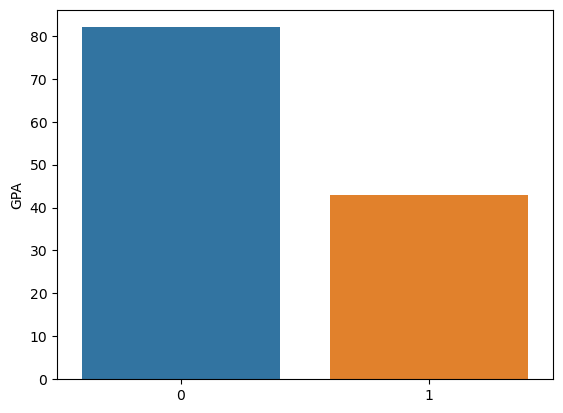

In [56]:
sns.barplot(x=np.arange(0,2,1), y=scaled_features.groupby(['cluster']).count().GPA)

In [57]:
size_array=list(scaled_features.groupby(['cluster']).count().GPA.values)

In [58]:
size_array

[82, 43]

In [59]:
scaled_features.groupby(['cluster']).mean()[['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons','comfort_food_reasons_coded',
        'cook','cuisine', 'diet_current', 'diet_current_coded', 'drink','eating_changes', 'eating_changes_coded',
        'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight']]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10.304878,1.402439,0.031554,-0.092870,0.000982,0.126241,-0.018751,0.047788,0.051196,0.027880,0.027006,-0.027045,0.106280,0.138706,0.088215,0.057854,0.065461,0.086878,0.022202,-0.052094,0.066014,0.028603,0.077681,-0.076711,0.039172,0.082047,-0.021584,-0.009298,0.101201,-0.160212,-0.000143,0.054969,-0.102328,0.048803,0.177609,-0.026278,-0.127350,-0.014514,-0.009818,-0.022415,-0.010443,0.098761,0.020757,-0.106308,-0.092549,-0.103229,0.006403,-0.035652,-0.041844,-0.107904,0.044873,-0.089940,0.040513,-0.178659,0.121455,0.037865,0.024788,-0.049919,0.023626
1,27.674419,1.372093,-0.060174,0.177102,-0.001872,-0.240738,0.035757,-0.091131,-0.097630,-0.053167,-0.051499,0.051574,-0.202673,-0.264509,-0.168224,-0.110326,-0.124833,-0.165674,-0.042340,0.099341,-0.125887,-0.054545,-0.148136,0.146286,-0.074700,-0.156461,0.041160,0.017732,-0.192988,0.305520,0.000274,-0.104825,0.195137,-0.093066,-0.338697,0.050112,0.242854,0.027677,0.018722,0.042745,0.019915,-0.188334,-0.039583,0.202728,0.176488,0.196856,-0.012210,0.067987,0.079795,0.205771,-0.085571,0.171513,-0.077258,0.340698,-0.231612,-0.072207,-0.047269,0.095194,-0.045054


In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
model = kmeans.fit(scaled_features)

In [61]:
scaled_features['cluster'] = kmeans.labels_

In [62]:
scaled_features

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,cluster
0,2,2,-0.355142,-1.127263,0.000000,-0.830800,-1.741338,1.358263,1.664261,3.486702e+00,-0.770246,0.000000,1.413711,-0.995871,-1.139541,1.216111,-0.710758,0.387940,1.078877,-2.340547,-0.940175,1.267079,1.552856,-1.434917,0.296883,-0.795764,1.559990,3.21926,0.843765,-0.333040,1.111688,-1.341990,1.275090,1.413711,2.066822,0.323779,1.247938,0.465099,-1.326137,-0.919018,1.604388,-2.106432,1.676274,1.539521,-0.477296,-0.709883,-1.358921,1.553078,-0.109274,-0.529712,-8.064778e-01,-1.632687,1.084565,-1.384030,0.181303,0.921074,-1.024295,0.975490,1.028603,0
1,19,1,-0.355142,0.250061,-0.048302,-0.372258,0.574271,0.609710,0.125461,-9.395305e-01,0.208608,-0.431212,-0.693326,0.314485,0.891815,-0.384626,-0.710758,-0.493742,-0.876587,0.218360,-0.940175,-1.240120,0.412815,-0.183536,-0.733960,-0.795764,0.598641,-0.31063,-0.243561,1.438451,0.376445,-0.177068,-0.665602,1.219642,-0.338697,-0.368438,0.572647,-1.244825,-1.326137,0.919018,-0.248583,0.498143,-0.338776,0.706447,-0.477296,-0.709883,0.571365,0.845057,-0.109274,-0.529712,-8.064778e-01,-0.933763,-1.110311,0.889301,-1.914046,-0.007428,0.976281,-0.700124,-0.095144,2
2,11,1,-0.355142,1.091758,1.658370,-0.372258,0.574271,1.025573,1.533300,-9.395305e-01,-1.749100,1.786451,1.690953,1.624841,-1.139541,1.609275,-0.710758,-0.493742,1.078877,1.071329,0.655273,-1.240120,1.492854,1.624015,-0.733960,1.428759,1.187855,-0.31063,0.843765,0.552705,1.111688,0.211239,1.635505,1.552332,1.104614,1.015996,1.247938,0.465099,0.612264,0.919018,0.920214,-1.238240,1.304265,0.706447,1.002321,-0.709883,-0.393778,1.553078,2.600715,-0.529712,1.260122e+00,1.163010,1.084565,-0.362679,0.732710,0.921074,-1.024295,-0.700124,2.058704,0
3,9,1,-0.355142,-1.127263,-0.048302,-0.372258,0.574271,-0.055670,-1.544301,-3.862514e-01,-0.770246,0.677619,-1.469603,0.314485,0.891815,-1.704533,-0.710758,-0.493742,1.078877,1.071329,2.250721,-1.240120,-0.307211,1.206888,0.296883,-0.795764,-1.727203,3.21926,-0.243561,1.438451,1.111688,0.599547,-0.748775,-1.026016,-0.819801,1.015996,1.247938,0.465099,-1.003070,0.919018,-0.932757,0.498143,0.405242,-0.959701,-0.477296,-0.709883,-1.358921,1.553078,1.697385,-0.529712,1.260122e+00,1.163010,-1.110311,0.889301,0.732710,-0.935930,-1.024295,0.975490,2.152349,0
4,14,1,-0.355142,1.091758,-1.754974,-0.372258,0.574271,-0.748775,0.256423,-9.395305e-01,-1.749100,0.677619,0.082951,0.314485,0.891815,-0.019546,1.941324,-0.493742,-0.876587,0.218360,-0.940175,0.431346,-0.487218,-0.114015,-0.733960,1.428759,-0.424730,-0.31063,-0.243561,1.438451,0.376445,0.211239,-1.469603,-0.360636,-0.819801,1.015996,-0.777935,0.465099,-1.326137,-0.919018,-1.474395,1.366334,0.560246,-0.126627,-0.477296,-0.709883,0.571365,-0.570985,0.794056,-0.529712,-8.064778e-01,0.464086,-0.037815,-0.362679,-0.480386,-0.007428,0.976281,-1.265391,1.122248,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,1,-0.355142,0.250061,1.658370,-0.372258,0.574271,1.718677,0.616568,2.457053e-16,0.208608,-0.431212,0.720607,0.314485,0.891815,0.092787,-0.710758,-0.493742,-2.832051,0.218360,0.655273

In [63]:
scaled_features.cluster.value_counts()

cluster
0    48
2    48
1    29
Name: count, dtype: int64

<Axes: ylabel='GPA'>

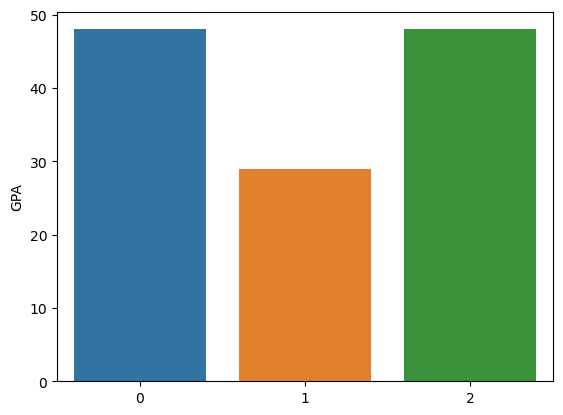

In [64]:
sns.barplot(x=np.arange(0,3,1), y=scaled_features.groupby(['cluster']).count().GPA)

In [65]:
size_array=list(scaled_features.groupby(['cluster']).count().GPA.values)

In [66]:
size_array

[48, 29, 48]

In [67]:
scaled_features.groupby(['cluster']).mean()[['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons','comfort_food_reasons_coded',
        'cook','cuisine', 'diet_current', 'diet_current_coded', 'drink','eating_changes', 'eating_changes_coded',
        'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight']]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.541667,1.458333,0.041222,-0.055214,0.066415,0.204105,-0.004631,-0.051049,0.165705,0.096563,0.004680,0.047485,0.073709,0.205289,-0.057803,0.085181,0.062766,0.130783,0.151717,-0.243665,0.035613,0.074138,0.202807,-0.012630,0.028434,0.084776,0.029456,0.057067,0.028270,-0.222322,-0.052447,0.041355,0.006709,0.084106,0.122361,-0.036751,-0.144850,-0.211746,-0.006948,0.038292,-0.05022,0.007116,0.129464,-0.109272,-0.138217,-0.233715,0.048579,-0.039969,0.022462,-0.214583,0.045154,-0.234839,-0.019109,-0.182844,0.082509,-0.065459,0.017672,-0.003213,0.119460
1,30.586207,1.413793,-0.245801,0.222356,-0.041640,-0.229951,0.095180,-0.141711,-0.019048,-0.001080,-0.136121,0.163563,-0.136931,-0.408470,-0.189639,0.025968,0.112302,-0.159311,-0.006975,0.159535,-0.182730,-0.087385,-0.239967,0.195235,-0.023034,-0.077955,-0.023723,-0.067190,-0.168573,0.308362,0.072206,-0.136898,0.170903,-0.026990,-0.305518,0.156692,0.293216,-0.124530,-0.056150,0.158451,-0.14635,-0.190423,-0.006320,0.419180,0.288023,0.217341,0.005591,0.107896,0.046473,0.057504,0.119929,0.247178,-0.169404,0.253086,-0.183767,-0.039445,-0.127485,0.023864,-0.085456
2,16.375000,1.312500,0.107283,-0.079126,-0.041258,-0.065176,-0.052873,0.136666,-0.154197,-0.095910,0.077559,-0.146304,0.009020,0.041495,0.172376,-0.100870,-0.130615,-0.034533,-0.147503,0.147279,0.074787,-0.021343,-0.057827,-0.105325,-0.014518,-0.037678,-0.015123,-0.016473,0.073576,0.036020,0.008823,0.041355,-0.109963,-0.067799,0.062223,-0.057917,-0.032301,0.286982,0.040872,-0.134023,0.13864,0.107931,-0.125646,-0.143983,-0.035797,0.102404,-0.051957,-0.025218,-0.050539,0.179841,-0.117611,0.085502,0.121457,0.029938,0.028517,0.089291,0.059350,-0.011204,-0.067831


In [68]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [69]:
model = kmeans.fit(scaled_features)

In [70]:
scaled_features['cluster'] = kmeans.labels_

In [71]:
scaled_features

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,cluster
0,2,2,-0.355142,-1.127263,0.000000,-0.830800,-1.741338,1.358263,1.664261,3.486702e+00,-0.770246,0.000000,1.413711,-0.995871,-1.139541,1.216111,-0.710758,0.387940,1.078877,-2.340547,-0.940175,1.267079,1.552856,-1.434917,0.296883,-0.795764,1.559990,3.21926,0.843765,-0.333040,1.111688,-1.341990,1.275090,1.413711,2.066822,0.323779,1.247938,0.465099,-1.326137,-0.919018,1.604388,-2.106432,1.676274,1.539521,-0.477296,-0.709883,-1.358921,1.553078,-0.109274,-0.529712,-8.064778e-01,-1.632687,1.084565,-1.384030,0.181303,0.921074,-1.024295,0.975490,1.028603,0
1,19,1,-0.355142,0.250061,-0.048302,-0.372258,0.574271,0.609710,0.125461,-9.395305e-01,0.208608,-0.431212,-0.693326,0.314485,0.891815,-0.384626,-0.710758,-0.493742,-0.876587,0.218360,-0.940175,-1.240120,0.412815,-0.183536,-0.733960,-0.795764,0.598641,-0.31063,-0.243561,1.438451,0.376445,-0.177068,-0.665602,1.219642,-0.338697,-0.368438,0.572647,-1.244825,-1.326137,0.919018,-0.248583,0.498143,-0.338776,0.706447,-0.477296,-0.709883,0.571365,0.845057,-0.109274,-0.529712,-8.064778e-01,-0.933763,-1.110311,0.889301,-1.914046,-0.007428,0.976281,-0.700124,-0.095144,1
2,11,1,-0.355142,1.091758,1.658370,-0.372258,0.574271,1.025573,1.533300,-9.395305e-01,-1.749100,1.786451,1.690953,1.624841,-1.139541,1.609275,-0.710758,-0.493742,1.078877,1.071329,0.655273,-1.240120,1.492854,1.624015,-0.733960,1.428759,1.187855,-0.31063,0.843765,0.552705,1.111688,0.211239,1.635505,1.552332,1.104614,1.015996,1.247938,0.465099,0.612264,0.919018,0.920214,-1.238240,1.304265,0.706447,1.002321,-0.709883,-0.393778,1.553078,2.600715,-0.529712,1.260122e+00,1.163010,1.084565,-0.362679,0.732710,0.921074,-1.024295,-0.700124,2.058704,3
3,9,1,-0.355142,-1.127263,-0.048302,-0.372258,0.574271,-0.055670,-1.544301,-3.862514e-01,-0.770246,0.677619,-1.469603,0.314485,0.891815,-1.704533,-0.710758,-0.493742,1.078877,1.071329,2.250721,-1.240120,-0.307211,1.206888,0.296883,-0.795764,-1.727203,3.21926,-0.243561,1.438451,1.111688,0.599547,-0.748775,-1.026016,-0.819801,1.015996,1.247938,0.465099,-1.003070,0.919018,-0.932757,0.498143,0.405242,-0.959701,-0.477296,-0.709883,-1.358921,1.553078,1.697385,-0.529712,1.260122e+00,1.163010,-1.110311,0.889301,0.732710,-0.935930,-1.024295,0.975490,2.152349,0
4,14,1,-0.355142,1.091758,-1.754974,-0.372258,0.574271,-0.748775,0.256423,-9.395305e-01,-1.749100,0.677619,0.082951,0.314485,0.891815,-0.019546,1.941324,-0.493742,-0.876587,0.218360,-0.940175,0.431346,-0.487218,-0.114015,-0.733960,1.428759,-0.424730,-0.31063,-0.243561,1.438451,0.376445,0.211239,-1.469603,-0.360636,-0.819801,1.015996,-0.777935,0.465099,-1.326137,-0.919018,-1.474395,1.366334,0.560246,-0.126627,-0.477296,-0.709883,0.571365,-0.570985,0.794056,-0.529712,-8.064778e-01,0.464086,-0.037815,-0.362679,-0.480386,-0.007428,0.976281,-1.265391,1.122248,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,1,-0.355142,0.250061,1.658370,-0.372258,0.574271,1.718677,0.616568,2.457053e-16,0.208608,-0.431212,0.720607,0.314485,0.891815,0.092787,-0.710758,-0.493742,-2.832051,0.218360,0.655273

In [72]:
scaled_features.cluster.value_counts()

cluster
3    45
0    37
1    25
2    18
Name: count, dtype: int64

<Axes: ylabel='GPA'>

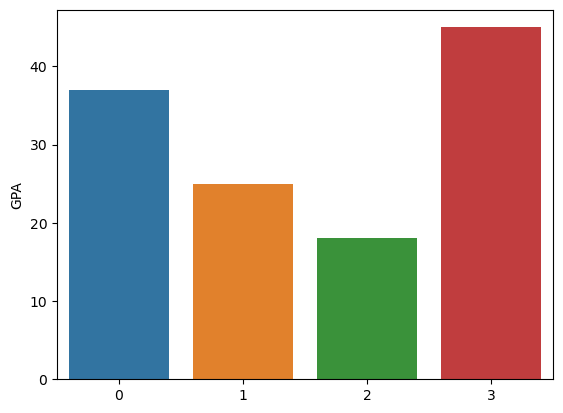

In [73]:
sns.barplot(x=np.arange(0,4,1), y=scaled_features.groupby(['cluster']).count().GPA)

In [74]:
size_array=list(scaled_features.groupby(['cluster']).count().GPA.values)

In [75]:
size_array

[37, 25, 18, 45]

In [76]:
scaled_features.groupby(['cluster']).mean()[['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons','comfort_food_reasons_coded',
        'cook','cuisine', 'diet_current', 'diet_current_coded', 'drink','eating_changes', 'eating_changes_coded',
        'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight']]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.513514,1.432432,-0.012341,-0.139767,-0.041775,0.135857,0.011015,0.014764,0.241380,0.169849,-0.029491,0.118209,0.139148,0.066580,-0.065614,0.050282,0.006021,-0.088645,0.198645,-0.265758,0.102411,0.171227,0.210105,-0.038857,0.087928,0.045947,-0.033318,0.166382,0.079698,-0.189406,-0.080599,0.011838,0.080703,0.103931,0.181415,-0.087810,-0.102644,-0.228113,-0.007675,0.074515,-0.057508,0.001923,0.147182,-0.126627,-0.157379,-0.237500,0.127921,-0.073456,-0.084859,-0.252396,0.074926,-0.178169,-0.089047,-0.204178,0.167890,-0.057617,-0.051042,-0.007180,-0.062241
1,23.840000,1.400000,0.152204,0.037341,-0.042506,-0.366144,0.018525,-0.121099,-0.097174,-0.058877,-0.073815,-0.096099,-0.357309,-0.104828,-0.083236,-0.356543,-0.392508,-0.141069,0.010789,0.013648,-0.189175,0.030194,0.214808,0.172413,-0.115454,-0.128407,0.259998,-0.028239,-0.287054,0.269267,-0.094111,-0.021745,0.293655,-0.215361,-0.377185,-0.036174,0.194484,0.259908,0.108279,-0.073521,0.346648,-0.092228,0.024553,-0.026658,0.055366,0.096802,-0.123538,0.018272,-0.000874,0.151459,-0.310494,0.156559,-0.016864,0.443860,-0.332609,-0.118848,0.016005,0.028263,0.043452
2,33.000000,1.333333,-0.355142,0.371214,0.054563,-0.066563,0.059691,-0.049509,-0.098265,-0.045237,-0.020504,0.256674,0.012100,-0.486288,-0.286262,0.231642,0.246938,-0.199848,-0.116129,0.218360,-0.037987,-0.172239,-0.652224,0.109998,-0.018097,-0.195424,-0.262782,0.081580,-0.062340,0.355873,0.131363,-0.220213,0.058307,0.076790,-0.285241,0.169953,0.310034,-0.294867,-0.105663,0.204226,-0.433880,-0.321816,-0.128660,0.521319,0.344714,0.335820,0.142412,0.137036,0.191836,0.281205,0.226822,0.192282,-0.161138,0.197417,-0.091338,-0.007428,-0.135150,0.188153,-0.167979
3,13.422222,1.377778,0.067646,-0.054311,0.036137,0.118334,-0.043225,0.074942,-0.105177,-0.088849,0.073459,-0.146475,0.079254,0.198009,0.214696,0.064079,0.114334,0.231197,-0.122872,0.123586,0.036088,-0.088666,-0.031201,-0.107835,-0.000916,0.111729,-0.011936,-0.153746,0.118881,-0.136208,0.066009,0.090432,-0.252820,0.003475,0.174480,0.024314,-0.147664,0.161113,-0.011579,-0.102113,0.028254,0.178383,-0.083192,-0.089602,-0.039244,0.007171,-0.093512,-0.004568,-0.006475,0.010899,0.020162,-0.017395,0.147040,-0.157676,0.083275,0.116372,0.087136,-0.085059,0.094228


Final Observation:

After conducting a thorough analysis with various values of k for K-Means clustering, it has been determined that k=4 is the most suitable choice for this dataset. This choice optimally segments the data into four distinct clusters, providing the best representation of the underlying patterns and structures within the data.